In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

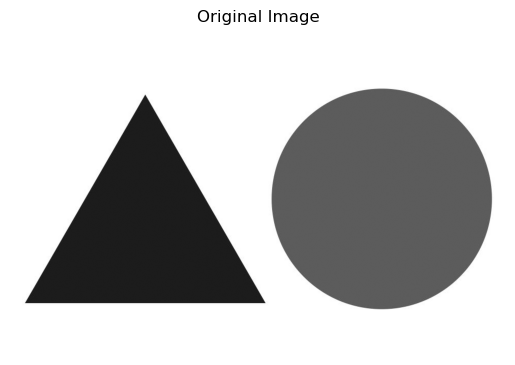

In [2]:
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

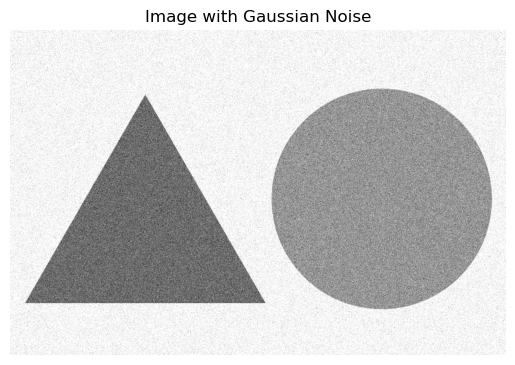

In [3]:
mean = 0
std_dev = 20
gaussian_noise = np.random.normal(mean, std_dev, image.shape).astype(np.int16)
noisy_image = np.clip(image.astype(np.int16) + gaussian_noise, 0, 255).astype(np.uint8)

plt.imshow(noisy_image, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')
plt.show()

In [4]:
# Implementation of Ostu's algorithm
def otsu_threshold(image):
    # Computing histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).ravel()
    total = image.size

    # Normalizing the histogram
    prob = hist / total

    # Computing cumulative sums and means
    cumulative_prob = np.cumsum(prob)
    cumulative_mean = np.cumsum(prob * np.arange(256))
    global_mean = cumulative_mean[-1]

    # Computing between-class variance for all thresholds
    between_class_variance = ((global_mean * cumulative_prob - cumulative_mean) ** 2) / (cumulative_prob * (1 - cumulative_prob) + 1e-6)

    # Finding the threshold with max between-class variance
    optimal_threshold = np.argmax(between_class_variance)

    return optimal_threshold

In [5]:
# Testing the implemented Otsu's algorithm
threshold = otsu_threshold(noisy_image)
otsu_result = (noisy_image >= threshold).astype(np.uint8) * 255

# Using built-in Otsu's algorithm in OpenCV
_, otsu_thresh = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

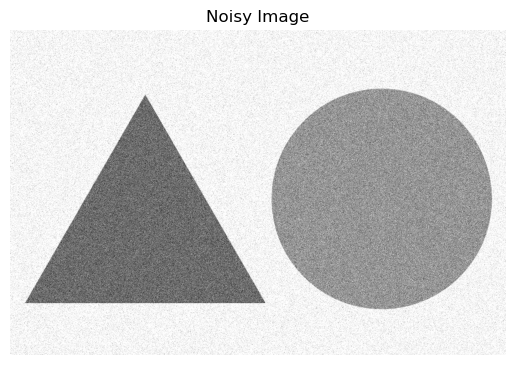

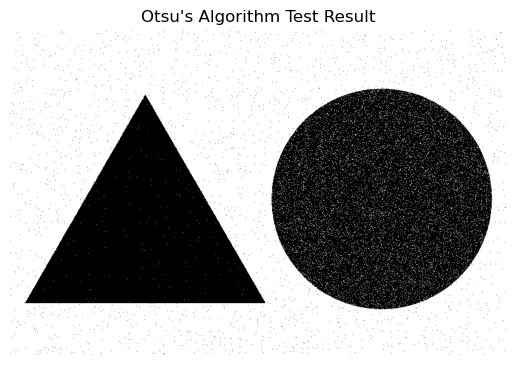

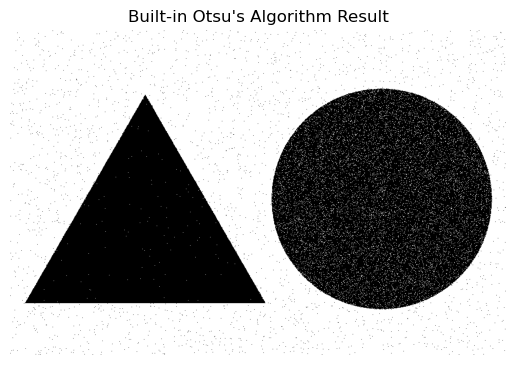

In [6]:
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.show()

# Plotting the output obtained from implemented Otsu's algorithm in OpenCV
plt.imshow(otsu_result, cmap='gray')
plt.title("Otsu's Algorithm Test Result")
plt.axis('off')
plt.show()

# Plotting the output obtained from the built-in Otsu's algorithm in OpenCV
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Built-in Otsu's Algorithm Result")
plt.axis('off')
plt.show()

In [7]:
def region_growing(img, seed, threshold=10):
    height, width = img.shape
    segmented = np.zeros_like(img, dtype=np.uint8)
    visited = np.zeros_like(img, dtype=bool)

    seed_value = img[seed]
    queue = [seed]

    while queue:
        x, y = queue.pop(0)
        if visited[x, y]:
            continue
        visited[x, y] = True

        if abs(int(img[x, y]) - int(seed_value)) <= threshold:
            segmented[x, y] = 255
        
            for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                    queue.append((nx, ny))

    return segmented

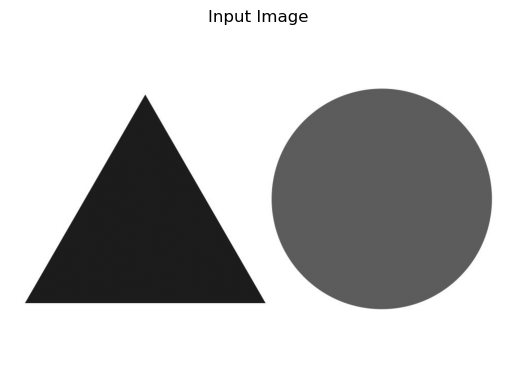

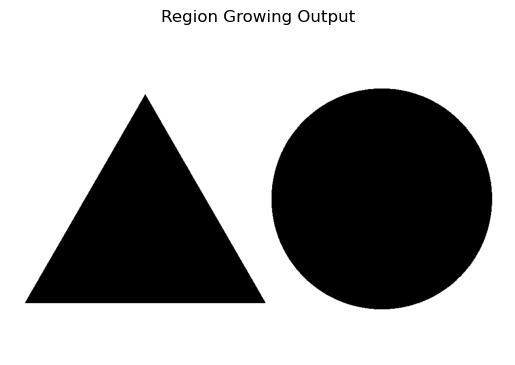

In [8]:
seed_point = (50, 50)
seg_result = region_growing(image, seed=seed_point, threshold=15)

plt.imshow(image, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

# Plotting the output after applying region-growing technique
plt.imshow(seg_result, cmap='gray')
plt.title("Region Growing Output")
plt.axis('off')
plt.show()